# 모듈 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 데이터 불러오기

In [3]:
train = pd.read_csv("bike.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#캘리포니아 기준 데이터? 'season'에서 1-2월도 봄으로 되어 있음 
#미국 > 'holiday'에서 미국 공휴일 1로 변경
#'casual' + 'registered' = 'count'

# 컬럼 분할

In [6]:
train["datetime"] = pd.to_datetime(train["datetime"]) #'datetime' 컬럼 타입 변경

In [7]:
datetime = train["datetime"]

In [8]:
train["year"] = datetime.dt.year
train["month"] = datetime.dt.month
train["day"] = datetime.dt.day

In [9]:
train["hour"] = datetime.dt.hour
train["minute"] = datetime.dt.minute #분, 초는 모두 0 > 삭제할 예정
train["second"] = datetime.dt.second

# 데이터 탐색

In [10]:
train[train["year"] == 2011]["count"].mean() #2011년 자전거 대여 횟수의 평균

144.223349317595

In [11]:
train[train["year"] == 2012]["count"].mean() #2012년 자전거 대여 횟수의 평균

238.56094436310394

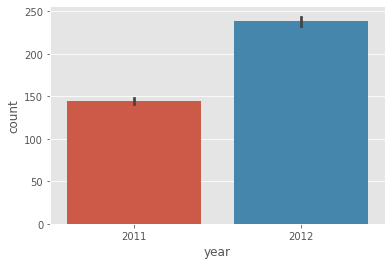

In [12]:
sns.barplot(data = train, x = "year", y = "count") #두 년도의 자전거 대여 횟수의 평균을 시각화 > 2012년에 자전거 대여 횟수 증가

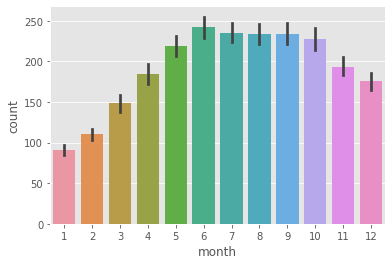

In [13]:
sns.barplot(data = train, x = "month", y = "count") #같은 방법으로 월별 자전거 대여 수 평균 시각화 > 5-10월에 자전거 대여 횟수 증가

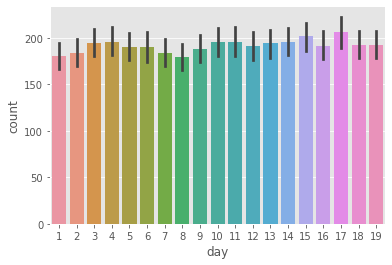

In [14]:
sns.barplot(data = train, x = "day", y = "count") #전체 데이터 중 일부만 존재 > 삭제

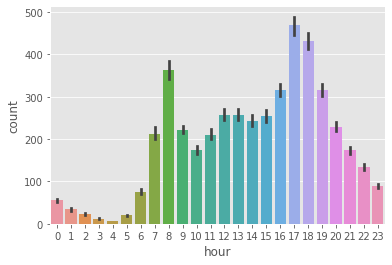

In [15]:
sns.barplot(data = train, x = "hour", y = "count") #출근(8시), 퇴근(17-18시)에 자전거 대여 횟수 증가

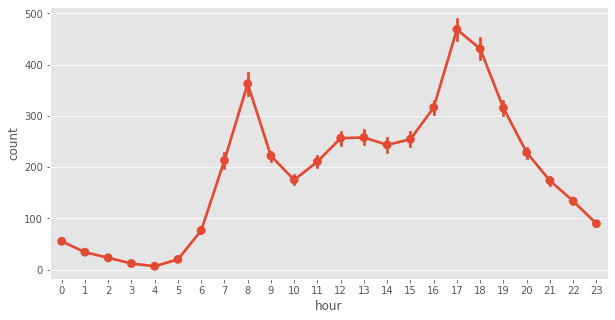

In [16]:
plt.figure(figsize = (10, 5))
sns.pointplot(data = train, x = 'hour', y = 'count')

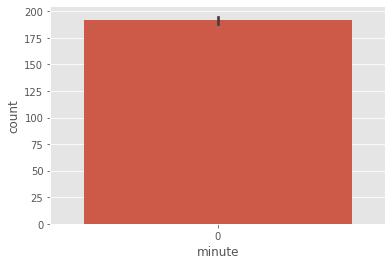

In [17]:
sns.barplot(data = train, x = "minute", y = "count") #모든 데이터가 0 > 삭제, 'second'도 동일, 표준편차도 '0' (차이가 없음)

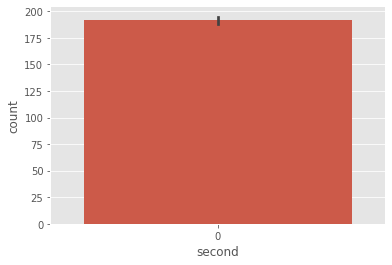

In [18]:
sns.barplot(data = train, x = "second", y = "count") 

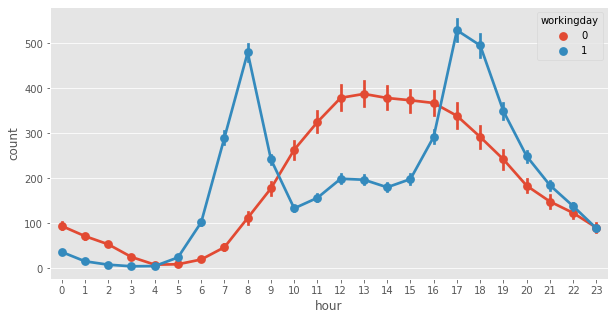

In [19]:
plt.figure(figsize = (10, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday') #주중(1), 주말(0)의 자전거 대여 분포가 다름

In [20]:
train["dayofweek"] = datetime.dt.dayofweek #요일을 리턴받아 'dayofweek'에 추가

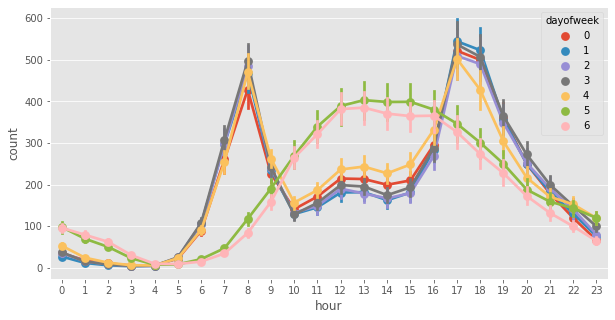

In [21]:
plt.figure(figsize = (10, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek') #주중(0-4), 주말(5-6)의 자전거 대여 분포가 다름

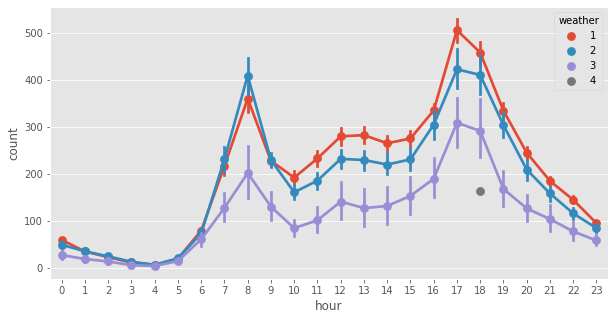

In [22]:
#맑음(1), 안개(2), 가벼운 눈/비(3), 심한 눈/비(4)
plt.figure(figsize = (10, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

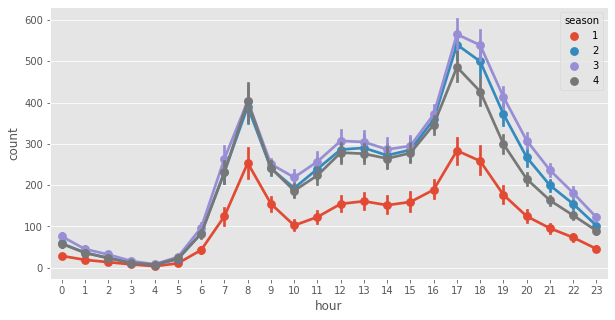

In [23]:
#봄(1), 여름(2), 가을(3), 겨울(4)
plt.figure(figsize = (10, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

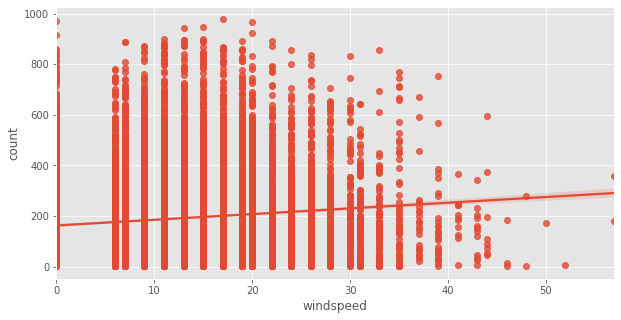

In [24]:
plt.figure(figsize = (10, 5))
sns.regplot(data = train, x = 'windspeed', y = 'count') #풍속

상관 분석

In [25]:
train.corr()["count"]

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
minute             NaN
second             NaN
dayofweek    -0.002283
Name: count, dtype: float64

In [26]:
train.corr()["temp"] #'atemp'와 상관관계 매우 높음 > 둘 중 하나 삭제

season        0.258689
holiday       0.000295
workingday    0.029966
weather      -0.055035
temp          1.000000
atemp         0.984948
humidity     -0.064949
windspeed    -0.017852
casual        0.467097
registered    0.318571
count         0.394454
year          0.061226
month         0.257589
day           0.015551
hour          0.145430
minute             NaN
second             NaN
dayofweek    -0.038466
Name: temp, dtype: float64

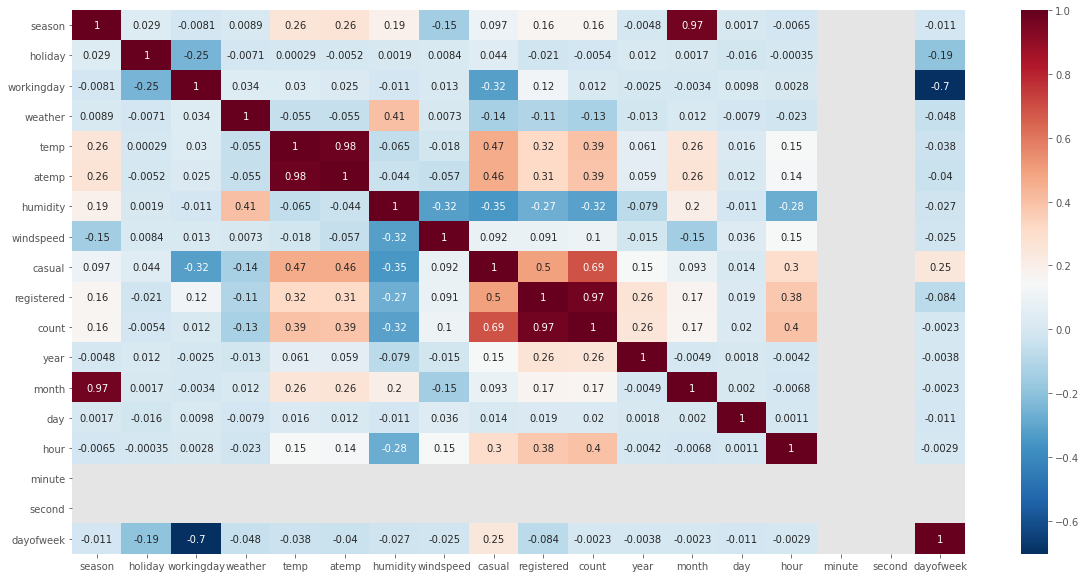

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr(), annot = True, cmap = "RdBu_r")

#전처리 없이 선형 회귀

In [28]:
y = train["count"]
X = train.copy()

선형 회귀

In [29]:
X.drop(["count", "datetime", "casual", "registered", "day", "minute", "second"], axis = 1, inplace = True)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  hour        10886 non-null  int64  
 11  dayofweek   10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1020.7 KB


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [32]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
pred = lModel.predict(X_train)

In [34]:
lModel.score(X_train, y_train) #정확도 비율

0.3808472999618411

In [35]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(pred, y_train))
print("RMSE: ", mean_squared_error(pred, y_train) ** 0.5)

MSE:  20450.075158182597
RMSE:  143.00375924493244


In [36]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.42278048979331095

In [37]:
print("MSE: ", mean_squared_error(pred, y_test))
print("RMSE: ", mean_squared_error(pred, y_test) ** 0.5)

MSE:  18431.159126386716
RMSE:  135.76140514294448


# 전처리1

## 이상값 조회 및 처리

In [38]:
q1 = np.percentile(train["count"], 25)
q2 = np.percentile(train["count"], 50)
q3 = np.percentile(train["count"], 75)

IQR = q3-q1

print("대여량의 사분위수 및 사분위수 범위: q1 = {}, q2 = {}, q3 = {}, IQR = {}".format(q1, q2, q3, IQR))

대여량의 사분위수 및 사분위수 범위: q1 = 42.0, q2 = 145.0, q3 = 284.0, IQR = 242.0


In [39]:
#95% 신뢰구간에서의 '이상치(outlier)' 정의
#q1 - (1.5 * IQR) 보다 작거나, q3 + (1.5 * IQR) 보다 큰 경우

trainOutliers = train[(train["count"] < q1 - (1.5 * IQR)) | (train["count"] > q3 + (1.5 * IQR))]
trainOutliers.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.06,43,12.9980,89,623,712,2012,3,12,18,0,0,0
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.82,37,7.0015,62,614,676,2012,3,13,17,0,0,1
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.82,34,19.9995,96,638,734,2012,3,13,18,0,0,1
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.97,82,0.0000,34,628,662,2012,3,14,8,0,0,2
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.82,28,6.0032,140,642,782,2012,3,14,17,0,0,2


In [167]:
#이상치가 아닌 데이터만 리턴
trainWithoutOutliers = train[(train["count"] >= q1 - (1.5 * IQR)) & (train["count"] <= q3 + (1.5 * IQR))]
trainWithoutOutliers.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,year,day,hour,minute,second,dayofweek,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,14.395,81,6.0032,3,13,2.833213,2011,1,0,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,13.635,80,6.0032,8,32,3.713572,2011,1,1,0,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,13.635,80,6.0032,5,27,3.496508,2011,1,2,0,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,14.395,75,6.0032,3,10,2.639057,2011,1,3,0,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,14.395,75,6.0032,0,1,0.693147,2011,1,4,0,0,5,0,0,0


In [41]:
train = trainWithoutOutliers.copy()

In [42]:
train.iloc[6610:6615, :] #6611번째 행이 없음을 확인 가능

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,0,0
6612,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,0,0
6613,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,0,0
6614,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,0,0
6615,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,0,0


In [43]:
train.index = range(len(train)) #인덱스 재설정

## 데이터 정규화

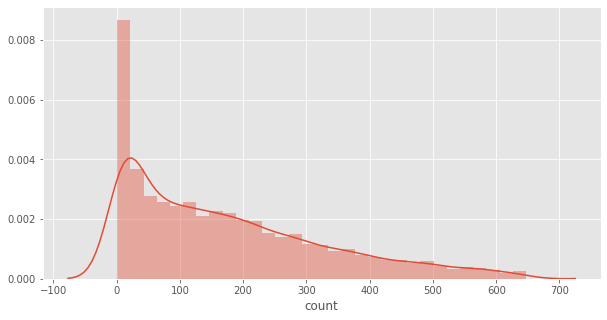

In [44]:
plt.figure(figsize = (10, 5))
sns.distplot(train["count"])

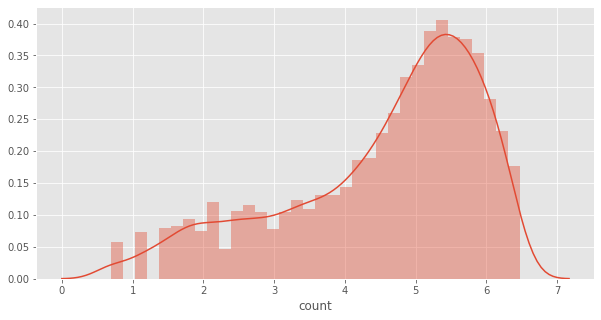

In [45]:
train["count"] = np.log1p(train["count"])

plt.figure(figsize = (10, 5))
sns.distplot(train["count"])

## 이상치 처리 / 정규화 후 선형 회귀

In [46]:
y = train["count"]
X = train.copy()

선형 회귀

In [47]:
X.drop(["count", "datetime", "casual", "registered"], axis = 1, inplace = True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [49]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pred = lModel.predict(X_train)

In [51]:
lModel.score(X_train, y_train) #정확도 비율

0.47443152155674373

In [52]:
print("MSE: ", mean_squared_error(pred, y_train))
print("RMSE: ", mean_squared_error(pred, y_train) ** 0.5)

MSE:  1.0194570883051735
RMSE:  1.0096816767205263


In [53]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.5004135397354104

In [54]:
print("MSE: ", mean_squared_error(pred, y_test))
print("RMSE: ", mean_squared_error(pred, y_test) ** 0.5)

MSE:  0.999053730838105
RMSE:  0.9995267534378982


결측치 처리

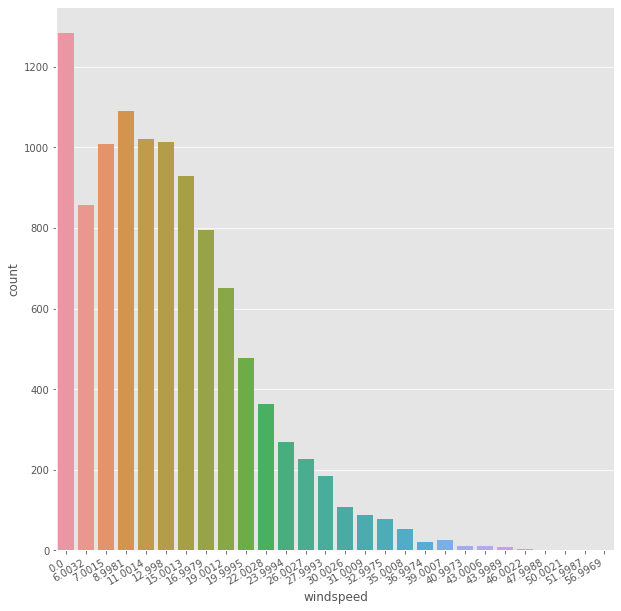

In [55]:
#'windspeed'에 0 값이 가장 많음 > 잘못된 데이터 고쳐야 함
plt.figure(figsize = (10, 10))
plt.xticks(rotation = 30, ha = "right")
sns.countplot(data = train, x = "windspeed")

In [56]:
trainWind0 = train[train["windspeed"] == 0]
trainWindNot0 = train[train["windspeed"] != 0]

In [57]:
trainWindNot0["windspeed"].mean()

14.541892215891192

In [58]:
trainWindNot0["windspeed"].median()

12.998

In [83]:
#'windspeed'가 0이 아닌 데이터의 평균과 중앙값이 거의 같음 > 이상치 거의 없을 것

#전처리2

## 결측치 처리: 평균 대치

In [59]:
X = train.copy()

In [60]:
#'windspeed'가 0인 행에, 0이 아닌 행의 평균을 대입
X.loc[X["windspeed"] == 0, "windspeed"] = trainWindNot0["windspeed"].mean()

## 결측치 처리 후 선형 회귀

In [61]:
y = train["count"]
X = train.copy()

선형 회귀

In [62]:
X.drop(["count", "datetime", "casual", "registered"], axis = 1, inplace = True)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [64]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
pred = lModel.predict(X_train)

In [66]:
lModel.score(X_train, y_train) #정확도 비율

0.47443152155674373

In [67]:
print("MSE: ", mean_squared_error(pred, y_train))
print("RMSE: ", mean_squared_error(pred, y_train) ** 0.5)

MSE:  1.0194570883051735
RMSE:  1.0096816767205263


In [68]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.5004135397354104

In [69]:
print("MSE: ", mean_squared_error(pred, y_test))
print("RMSE: ", mean_squared_error(pred, y_test) ** 0.5)

MSE:  0.999053730838105
RMSE:  0.9995267534378982


# 전처리 3


## 결측치 처리: 예측
 > 날씨 데이터를 이용해 풍속을 예측(RandomForest 이용)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
def predict_windspeed(data):
  dataWind0 = data[data["windspeed"] == 0]
  dataWindNot0 = data[data["windspeed"] != 0]

  wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"] #풍속을 예측할 features

  dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

  #RandomForest 모델 적합
  rfModel_wind = RandomForestClassifier()
  rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

  wind0Values = rfModel_wind.predict(X = dataWind0[wCol]) #'windspeed'가 0인 데이터의 풍속 예측

  predictWind0 = dataWind0
  predictWindNot0 = dataWindNot0

  predictWind0["windspeed"] = wind0Values #예측한 값 대입

  data = pd.concat([predictWind0, predictWindNot0])
  data["windspeed"] = data["windspeed"].astype("float")

  return data

In [75]:
train_wind_not_zero = predict_windspeed(train.copy())
train_wind_not_zero

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,0.693147,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2


In [76]:
train_wind_not_zero[train_wind_not_zero["windspeed"] == 0] #'windspeed'가 0인 행 없음 확인 가능

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek


## 결측치 처리 후 선형 회귀

In [77]:
y = train_wind_not_zero["count"]
X = train_wind_not_zero.copy()

선형 회귀

In [78]:
X.drop(["count", "datetime", "casual", "registered"], axis = 1, inplace = True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [80]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
pred = lModel.predict(X_train)

In [82]:
lModel.score(X_train, y_train) #정확도 비율

0.4797777878251489

In [83]:
print("MSE: ", mean_squared_error(pred, y_train))
print("RMSE: ", mean_squared_error(pred, y_train) ** 0.5)

MSE:  1.0207054638919586
RMSE:  1.010299690137515


In [84]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.4787952313137642

In [85]:
print("MSE: ", mean_squared_error(pred, y_test))
print("RMSE: ", mean_squared_error(pred, y_test) ** 0.5)

MSE:  0.9951116644403729
RMSE:  0.9975528379190612


#전처리4

In [86]:
train = train_wind_not_zero.copy() #데이터프레임 'train' 업데이트

## 컬럼 추가(peak)

In [87]:
train["peak"] = 0 #'peak' 컬럼 생성 > 가장 많이 대여하는 시간대의 'peak' 컬럼 값을 1로 변경할 것

In [88]:
for index in range(len(train)):
  workingday = train.loc[index, "workingday"]
  hour= train.loc[index, "hour"]

  print("index: ", index)
  print("working day: ", workingday)
  print("hour: ", hour)
  print()

  if workingday == 1:
    if hour == 8 or (17 <= hour <= 18):
      train.loc[index, "peak"] = 1
  else:
    if 10 <= hour <= 19:
      train.loc[index, "peak"] = 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
working day:  1
hour:  4

index:  9337
working day:  1
hour:  5

index:  9338
working day:  1
hour:  6

index:  9339
working day:  1
hour:  7

index:  9340
working day:  1
hour:  9

index:  9341
working day:  1
hour:  10

index:  9342
working day:  1
hour:  11

index:  9343
working day:  1
hour:  12

index:  9344
working day:  1
hour:  13

index:  9345
working day:  1
hour:  14

index:  9346
working day:  1
hour:  15

index:  9347
working day:  1
hour:  16

index:  9348
working day:  1
hour:  19

index:  9349
working day:  1
hour:  20

index:  9350
working day:  1
hour:  21

index:  9351
working day:  1
hour:  22

index:  9352
working day:  1
hour:  23

index:  9353
working day:  1
hour:  0

index:  9354
working day:  1
hour:  1

index:  9355
working day:  1
hour:  2

index:  9356
working day:  1
hour:  3

index:  9357
working day:  1
hour:  4

index:  9358
working day:  1
hour:  5

index:  9359
working day:  1
hour:  6

index:  9360
working day:  1


## 컬럼 추가(ideal)
> 온도 > 27도 이고 풍속 < 30인 경우

In [89]:
train["ideal"] = 0
for index in range(len(train)):
  if (train.loc[index, "temp"] > 27) & (train.loc[index, "windspeed"] < 30):
    train.loc[index, "ideal"] = 1

## 컬럼 추가(sticky)
> 습도 >= 60 이고 근무일인 경우

In [90]:
train["sticky"] = 0
for index in range(len(train)):
  if (train.loc[index, "humidity"] >= 60) & (train.loc[index, "workingday"] == 1):
    train.loc[index, "sticky"] = 1

In [91]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,2.833213,2011,1,1,0,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,3.713572,2011,1,1,1,0,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,3.496508,2011,1,1,2,0,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,2.639057,2011,1,1,3,0,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,0.693147,2011,1,1,4,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0,0,1


## 컬럼 추가 후 선형 회귀

In [92]:
y = train["count"]
X = train.copy()

선형 회귀

In [93]:
X.drop(["count", "datetime", "casual", "registered"], axis = 1, inplace = True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [95]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
pred = lModel.predict(X_train)

In [97]:
lModel.score(X_train, y_train) #정확도 비율

0.5698109735035238

In [98]:
print("MSE: ", mean_squared_error(pred, y_train))
print("RMSE: ", mean_squared_error(pred, y_train) ** 0.5)

MSE:  0.8440552509582804
RMSE:  0.9187247960941733


In [99]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.5676074725946023

In [100]:
print("MSE: ", mean_squared_error(pred, y_test))
print("RMSE: ", mean_squared_error(pred, y_test) ** 0.5)

MSE:  0.8255466440234968
RMSE:  0.9085959740299848


#전처리5

## 다중공선성 처리

In [112]:
def variance_inflaction_factor(df, vif_column_index):
  k_vars = df.shape[1] #df의 컬럼 수
  print("k_vars: ", k_vars)

  x_i = df.iloc[:, vif_column_index] #VIF를 계산할 칸(vif_column_index) 대입
  x_noti = df.iloc[:, np.arange(k_vars) != vif_column_index] #vif_column_index를 제외한 컬럼의 인덱스
  print("x_noti.columns: ", x_noti.columns)

  #x_noti로 x_i가 예측되는 r_square 계산
  r_square = LinearRegression().fit(X = x_noti, y = x_i).score(X = x_noti, y = x_i)
  print("r_square: ", r_square)

  #VIF 계산
  vif = 1 / (1 - r_square)
  print("vif: ", vif)
  return vif

In [117]:
vif_X = train.copy()

In [118]:
vif_X.drop(["count", "datetime", "casual", "registered", "day", "minute", "second"], axis = 1, inplace = True)

In [119]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflaction_factor(vif_X, i) for i in range(vif_X.shape[1])]

k_vars:  15
x_noti.columns:  Index(['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal',
       'sticky'],
      dtype='object')
r_square:  0.9456329450237951
vif:  18.39349216980165
k_vars:  15
x_noti.columns:  Index(['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal',
       'sticky'],
      dtype='object')
r_square:  0.34673620871550315
vif:  1.5307751835345476
k_vars:  15
x_noti.columns:  Index(['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal',
       'sticky'],
      dtype='object')
r_square:  0.7441272730789544
vif:  3.90819299904741
k_vars:  15
x_noti.columns:  Index(['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal',
       'sticky'],
 

In [121]:
vif["features"] = vif_X.columns

In [122]:
vif

,VIF Factor,features
0,18.393492,season
1,1.530775,holiday
2,3.908193,workingday
3,1.264147,weather
4,43.213734,temp
5,39.529706,atemp
6,2.618512,humidity
7,1.264904,windspeed
8,1.021668,year
9,18.518177,month


In [123]:
vif_X.drop(["temp"], axis = 1, inplace = True) #VIF가 가장 큰 feature 'temp' 제거

In [124]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflaction_factor(vif_X, i) for i in range(vif_X.shape[1])]
vif["features"] = vif_X.columns
vif

k_vars:  14
x_noti.columns:  Index(['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.9456299753996346
vif:  18.392487539784536
k_vars:  14
x_noti.columns:  Index(['season', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.3449315907252857
vif:  1.5265581210169954
k_vars:  14
x_noti.columns:  Index(['season', 'holiday', 'weather', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.7429116925300712
vif:  3.88971404355668
k_vars:  14
x_noti.columns:  Index(['season', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.20727015836726004
vif:  1.

,VIF Factor,features
0,18.392488,season
1,1.526558,holiday
2,3.889714,workingday
3,1.261464,weather
4,2.075885,atemp
5,2.617831,humidity
6,1.195666,windspeed
7,1.020457,year
8,18.511173,month
9,1.150964,hour


In [125]:
vif_X.drop(["month"], axis = 1, inplace = True) #VIF가 가장 큰 feature 'month' 제거

In [126]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflaction_factor(vif_X, i) for i in range(vif_X.shape[1])]
vif["features"] = vif_X.columns
vif

k_vars:  13
x_noti.columns:  Index(['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'year', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.12562423839437886
vif:  1.1436730567229978
k_vars:  13
x_noti.columns:  Index(['season', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'year', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.34040298534193825
vif:  1.5160772074118691
k_vars:  13
x_noti.columns:  Index(['season', 'holiday', 'weather', 'atemp', 'humidity', 'windspeed',
       'year', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.7428560076911883
vif:  3.8888717213314123
k_vars:  13
x_noti.columns:  Index(['season', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'year', 'hour', 'dayofweek', 'peak', 'ideal', 'sticky'],
      dtype='object')
r_square:  0.2069468167972215
vif:  1.2609494812963968
k_vars:  13
x_no

,VIF Factor,features
0,1.143673,season
1,1.516077,holiday
2,3.888872,workingday
3,1.260949,weather
4,2.070221,atemp
5,2.606830,humidity
6,1.195252,windspeed
7,1.020455,year
8,1.150622,hour
9,2.820560,dayofweek


## 다중공선성 처리 후 선형 회귀

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [128]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
pred = lModel.predict(X_train)

In [130]:
lModel.score(X_train, y_train) #정확도 비율

0.5698109735035238

In [131]:
print("MSE: ", mean_squared_error(pred, y_train))
print("RMSE: ", mean_squared_error(pred, y_train) ** 0.5)

MSE:  0.8440552509582804
RMSE:  0.9187247960941733


In [132]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.5676074725946023

In [133]:
print("MSE: ", mean_squared_error(pred, y_test))
print("RMSE: ", mean_squared_error(pred, y_test) ** 0.5)

MSE:  0.8255466440234968
RMSE:  0.9085959740299848


# 여러가지 알고리즘을 이용한 예측

In [ ]:
train.drop(["temp", "month"], axis = 1, inplace = True)

In [136]:
X = train.copy()
X.pop("count")
X.drop(["datetime", "casual", "registered"], axis = 1, inplace = True)

In [138]:
X

,season,holiday,workingday,weather,atemp,humidity,windspeed,year,day,hour,minute,second,dayofweek,peak,ideal,sticky
0,1,0,0,1,14.395,81,6.0032,2011,1,0,0,0,5,0,0,0
1,1,0,0,1,13.635,80,6.0032,2011,1,1,0,0,5,0,0,0
2,1,0,0,1,13.635,80,6.0032,2011,1,2,0,0,5,0,0,0
3,1,0,0,1,14.395,75,6.0032,2011,1,3,0,0,5,0,0,0
4,1,0,0,1,14.395,75,6.0032,2011,1,4,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,19.695,50,26.0027,2012,19,19,0,0,2,0,0,0
10582,4,0,1,1,17.425,57,15.0013,2012,19,20,0,0,2,0,0,0
10583,4,0,1,1,15.910,61,15.0013,2012,19,21,0,0,2,0,0,1
10584,4,0,1,1,17.425,61,6.0032,2012,19,22,0,0,2,0,0,1


In [139]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

## 선형 회귀

In [142]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
lModel.score(X_train, y_train) #정확도 비율

0.5680618255715701

In [147]:
pred = lModel.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(pred, y_test))

MSE:  0.8262664714418845


In [149]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5672304521088603

## 랜덤 포레스트

In [151]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, max_depth = 15, random_state = 0, min_samples_split = 5)

In [152]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

In [153]:
print("MSE: ", mean_squared_error(pred, y_test))

MSE:  0.09136208261505453


In [154]:
r2_score(y_test, pred)

0.9521477289055277

In [155]:
rf_model.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=209652396, splitter='best')

In [156]:
import pydotplus
from sklearn import tree

In [158]:
dt_dot_data = tree.export_graphviz(
    rf_model.estimators_[0],
    feature_names = X_train.columns,
    special_characters = True,
    filled = True,
    rounded = True
)

In [159]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [160]:
dt_graph.write_pdf("tree01.pdf")

True

## XGBoost

In [162]:
from xgboost import XGBRegressor
import xgboost as xgb

In [163]:
model_xgb = xgb.XGBRegressor(n_estimator = 150, max_depth = 5, random_state = 0, min_child_weight = 7, learning_rate = 0.1)

In [164]:
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)

[05:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [165]:
print("MSE: ", mean_squared_error(pred, y_test))

MSE:  0.08792773683747852


In [166]:
r2_score(y_test, pred)

0.9539465193936251